In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, learning_curve
from matplotlib.patches import Patch
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import time
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

In [210]:
column_names = []
with open('spambase.names', 'r') as f:
    for line in f:
        if line.startswith('|') or line.strip() == '':
            continue  # Ignore comment lines or empty lines
        if ':' in line:
            # Extract the column name before the colon
            column_name = line.split(':')[0].strip()
            column_names.append(column_name)

column_names.append('spam')

spam_df = pd.read_csv('spambase.data', header=None, names=column_names)


In [211]:
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [212]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [213]:
spam_df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [214]:
spam_df.duplicated().sum()

391

In [215]:
spam_df = spam_df.drop_duplicates()

In [216]:
spam_df.duplicated().sum()

0

In [217]:
columns = spam_df.columns.tolist()
columns.remove('spam')

In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), columns)
    ])

In [219]:
y = spam_df['spam']
X = spam_df.drop('spam', axis=1)
X = preprocessor.fit_transform(X)

In [220]:
y.value_counts(normalize=True)

spam
0    0.601188
1    0.398812
Name: proportion, dtype: float64

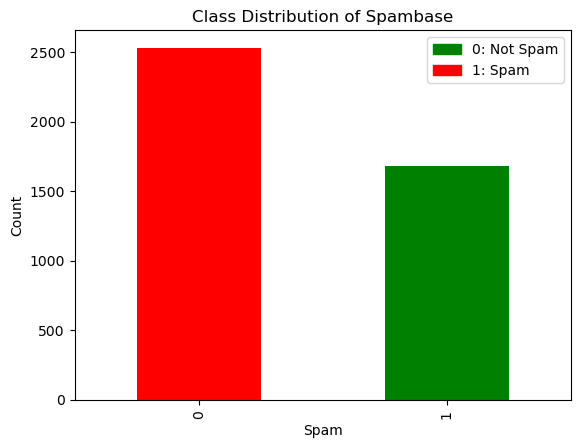

In [221]:
y.value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Distribution of Spambase')
plt.xlabel('Spam')
plt.ylabel('Count')
legend_patches = [
    Patch(color='green', label='0: Not Spam'),
    Patch(color='red', label='1: Spam')]
plt.legend(handles=legend_patches, loc='upper right')

plt.show()

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=903967749, stratify=y)

In [223]:
k_range = range(1,50)
f1 = make_scorer(f1_score, average='weighted')

In [224]:
train_scores, test_score = validation_curve(
    KNeighborsClassifier(),
    X_train, y_train,
    param_range=k_range,
    param_name='n_neighbors',
    scoring=f1,
    cv=5,
)

In [225]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_score, axis=1)

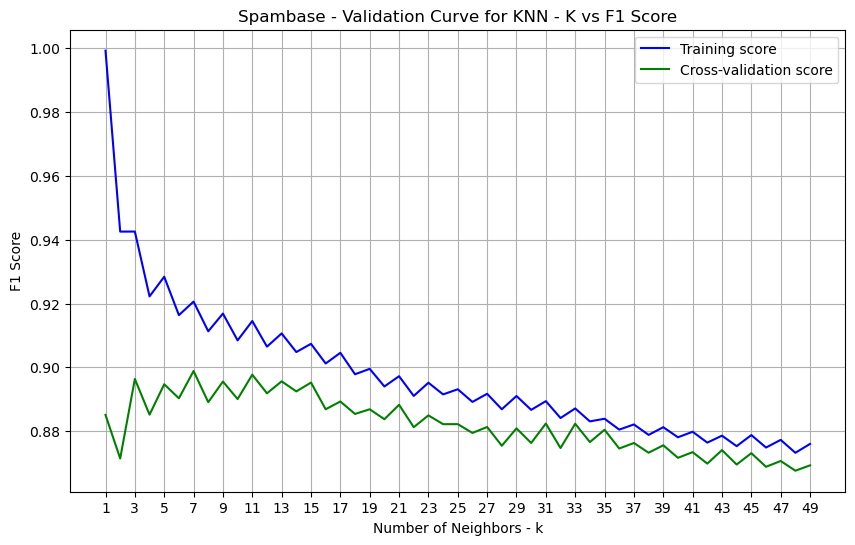

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_mean, label='Training score', color='blue')
plt.plot(k_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for KNN - K vs F1 Score')
plt.xlabel('Number of Neighbors - k')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.xticks(np.arange(1, 50, 2))
plt.grid(which='both', axis='both', alpha=1)
plt.show()

In [227]:
distance_metrics = ['euclidean', 'minkowski', 'manhattan']

In [228]:
train_scores, test_score = validation_curve(
    KNeighborsClassifier(n_neighbors=3),
    X_train, y_train,
    param_range=distance_metrics,
    param_name='metric',
    scoring=f1,
    cv=5
)

In [229]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_score, axis=1)

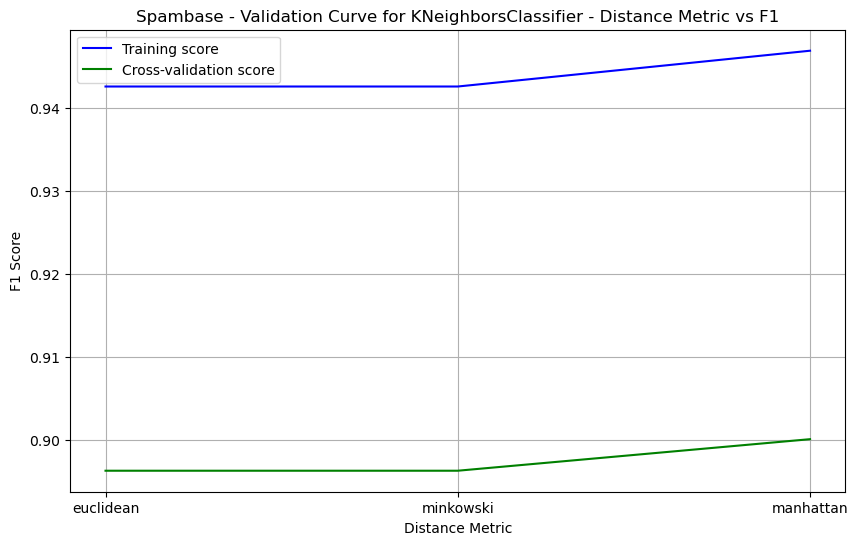

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(distance_metrics, train_mean, label='Training score', color='blue')
plt.plot(distance_metrics, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for KNeighborsClassifier - Distance Metric vs F1')
plt.xlabel('Distance Metric')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [231]:
weights = ['uniform', 'distance']

In [232]:
train_scores, test_score = validation_curve(
    KNeighborsClassifier(n_neighbors=3, metric='manhattan'),
    X_train, y_train,
    param_range=weights,
    param_name='weights',
    scoring=f1,
    cv=5
)

In [233]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_score, axis=1)

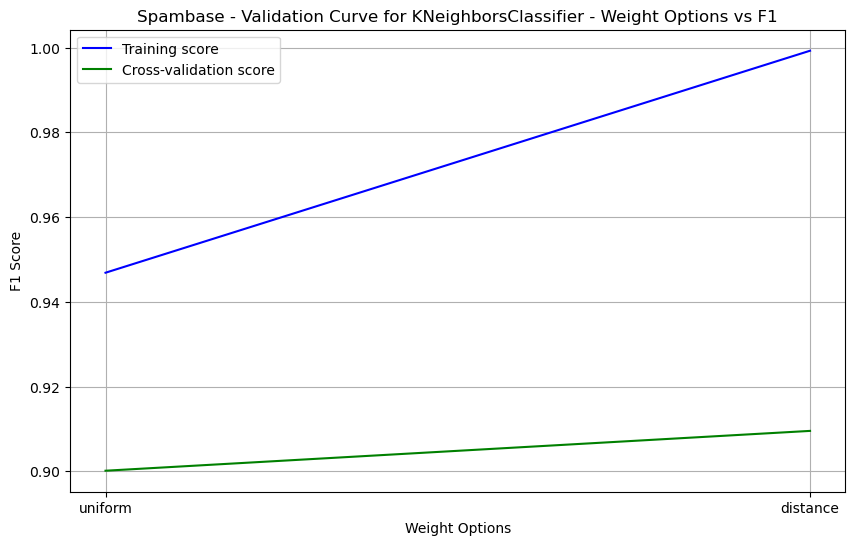

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(weights, train_mean, label='Training score', color='blue')
plt.plot(weights, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for KNeighborsClassifier - Weight Options vs F1')
plt.xlabel('Weight Options')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [235]:
train_sizes, train_scores, valid_scores = learning_curve(
KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='uniform'), X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring=make_scorer(f1_score, average='weighted')
)

In [236]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)

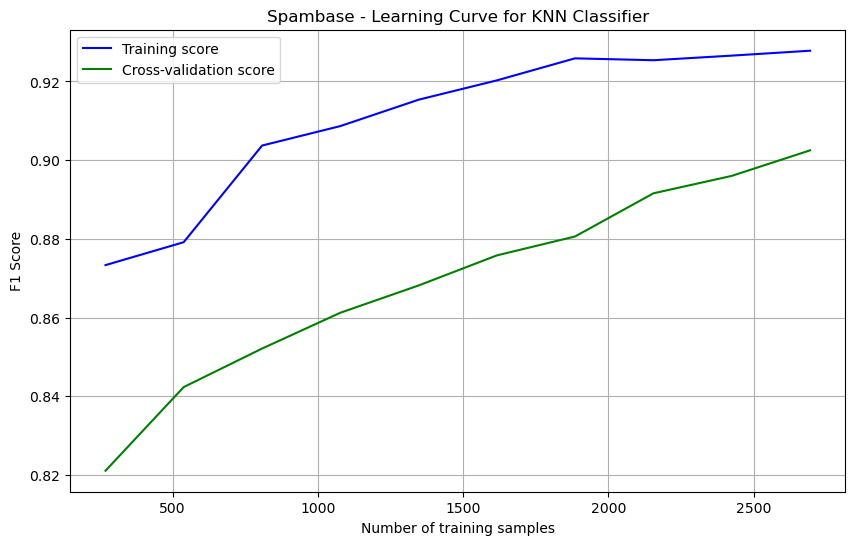

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Learning Curve for KNN Classifier')
plt.xlabel('Number of training samples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Test set F1 score:  0.9063327167300205


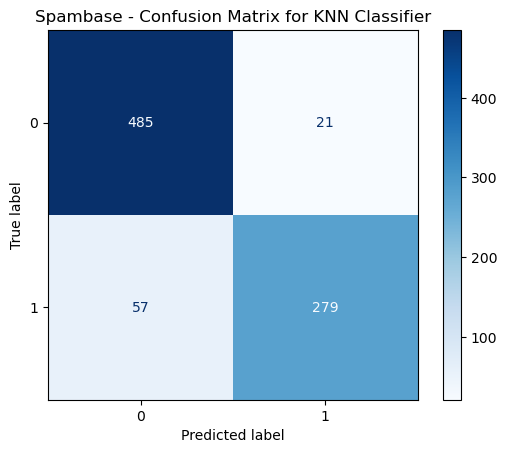

In [238]:
knn = KNeighborsClassifier(n_neighbors=11, metric='manhattan', weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set F1 score: ", test_f1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Spambase - Confusion Matrix for KNN Classifier')
plt.show()

## SVM

In [239]:
c_range = np.logspace(-4, 2, 10)

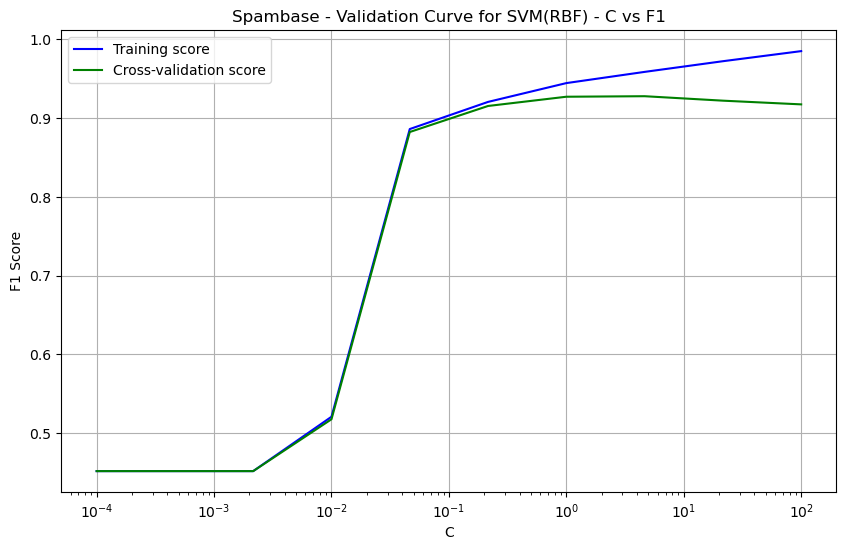

In [240]:
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'),
    X_train, y_train,
    param_range=c_range,
    param_name='C',
    scoring=f1,
    cv=5
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(c_range, train_mean, label='Training score', color='blue')
plt.semilogx(c_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for SVM(RBF) - C vs F1')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

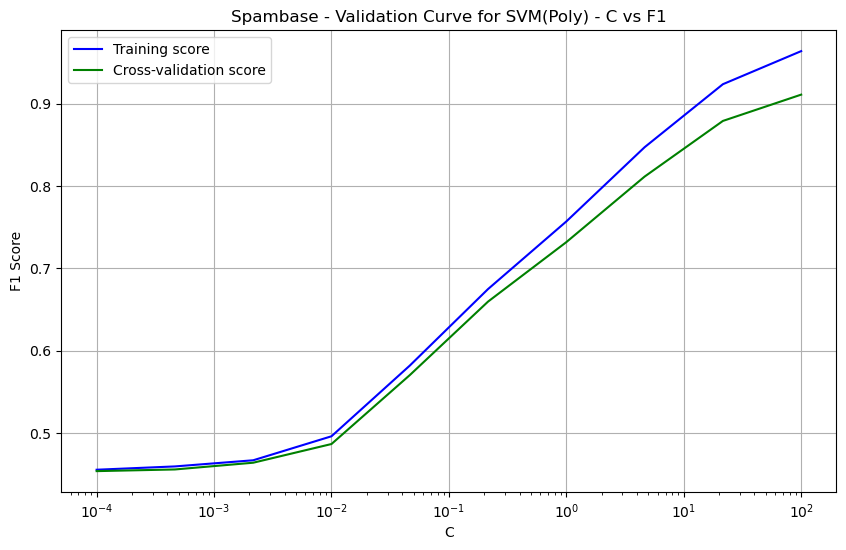

In [241]:
train_scores, test_scores = validation_curve(
    SVC(kernel='poly'),
    X_train, y_train,
    param_range=c_range,
    param_name='C',
    scoring=f1,
    cv=5
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(c_range, train_mean, label='Training score', color='blue')
plt.semilogx(c_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for SVM(Poly) - C vs F1')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

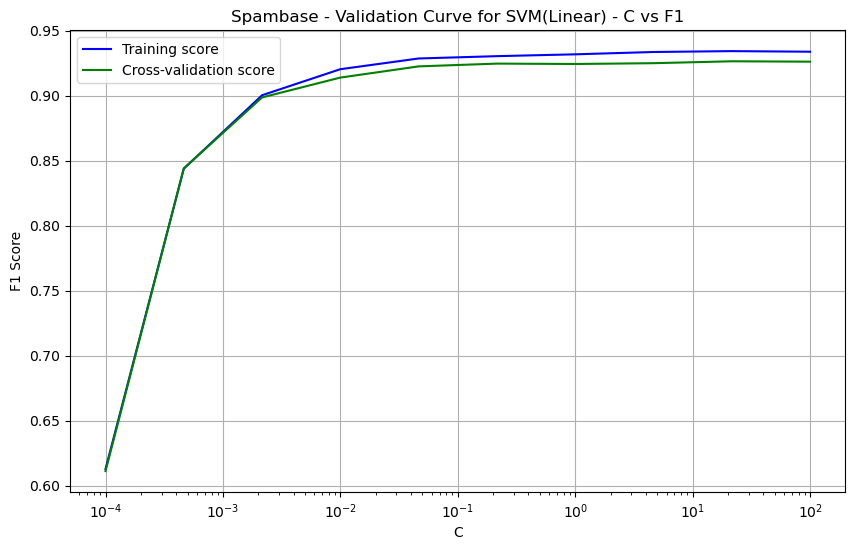

In [242]:
train_scores, test_scores = validation_curve(
    SVC(kernel='linear'),
    X_train, y_train,
    param_range=c_range,
    param_name='C',
    scoring=f1,
    cv=5
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(c_range, train_mean, label='Training score', color='blue')
plt.semilogx(c_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for SVM(Linear) - C vs F1')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

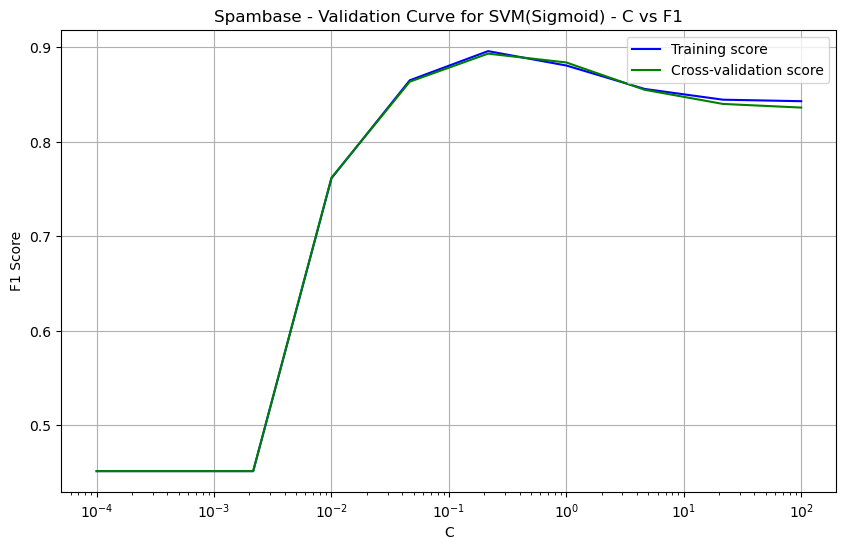

In [243]:
train_scores, test_scores = validation_curve(
    SVC(kernel='sigmoid'),
    X_train, y_train,
    param_range=c_range,
    param_name='C', 
    scoring=f1,
    cv=5
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(c_range, train_mean, label='Training score', color='blue')
plt.semilogx(c_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve for SVM(Sigmoid) - C vs F1')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [244]:
svc = SVC(kernel='linear', C=0.1)

train_sizes, train_scores, test_scores = learning_curve(
    svc, X_train, y_train, cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=903967749
)

python(26826) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26827) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26831) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26832) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(26833) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


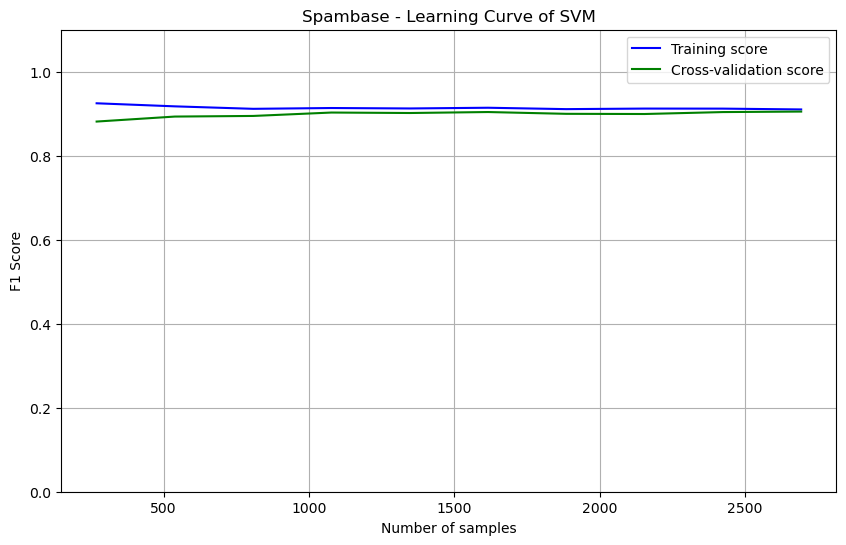

In [245]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Learning Curve of SVM')
plt.xlabel('Number of samples')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.ylim(0.0, 1.1)
plt.grid()
plt.show()

Test set F1 score:  0.9298006215448178


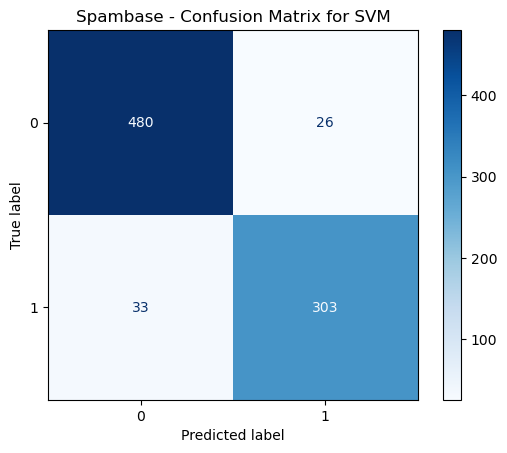

In [246]:
svc = SVC(kernel='linear', C=1)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test set F1 score: ", test_f1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Spambase - Confusion Matrix for SVM')
plt.show()

## Neural Networks

In [152]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive','invscaling'],
    'max_iter': [3000],
}


In [153]:
mlp = MLPClassifier(random_state=903967749)


In [18]:
random_search = RandomizedSearchCV(
    mlp, param_distributions=param_dist, n_iter=100, cv=5, random_state=903967749, n_jobs=-1, verbose=2
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 3000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (150,), 'alpha': 0.01, 'activation': 'relu'}


In [154]:
alpha_range = np.logspace(-3,1,30)

In [155]:
train_scores, test_scores = validation_curve(
        MLPClassifier(solver='adam', max_iter=3000, learning_rate='adaptive', hidden_layer_sizes=(150, ), activation='relu', random_state=903967749),
        X_train, y_train, param_range=alpha_range, param_name='alpha', cv=5,
        scoring=f1, n_jobs=-1
)

python(4650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4652) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4653) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4655) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4657) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


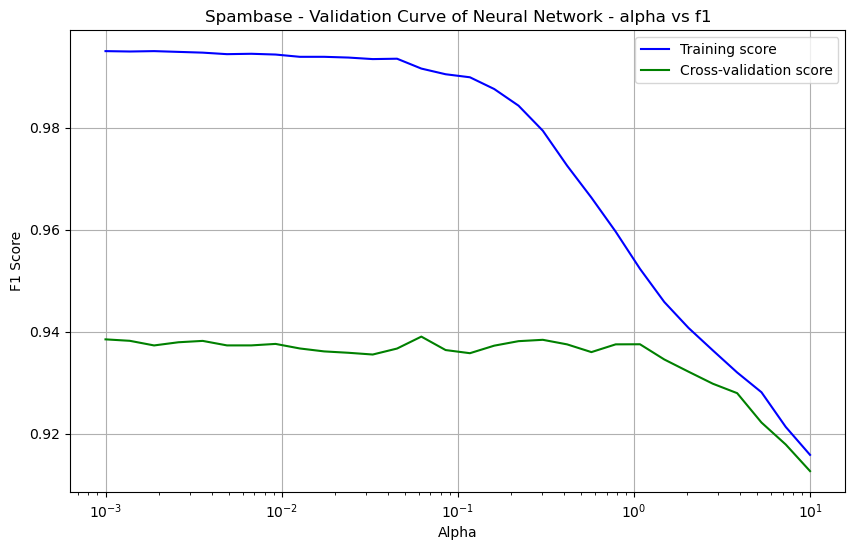

In [156]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.semilogx(alpha_range, train_mean, label='Training score', color='blue')
plt.semilogx(alpha_range, test_mean, label='Cross-validation score', color='green')
plt.title('Spambase - Validation Curve of Neural Network - alpha vs f1')
plt.xlabel('Alpha')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [159]:
hidden_layer_sizes_range = [
    (25, ), (50,), (100,), (150,),
    (50, 50), (100, 50), (100, 100), (150, 100),
    (100, 100, 50), (150, 100, 50)
]
hidden_layer_sizes_labels = [str(hls) for hls in hidden_layer_sizes_range]

In [160]:
train_scores, test_scores = validation_curve(
    MLPClassifier(solver='adam', max_iter=3000, learning_rate='adaptive', alpha=0.01, activation='relu', random_state=903967749, verbose=True),
    X_train, y_train,
    param_name='hidden_layer_sizes',
    param_range=hidden_layer_sizes_range,
    cv=5,
    scoring=f1,
    n_jobs=-1
)

python(6584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6588) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6589) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6590) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6591) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


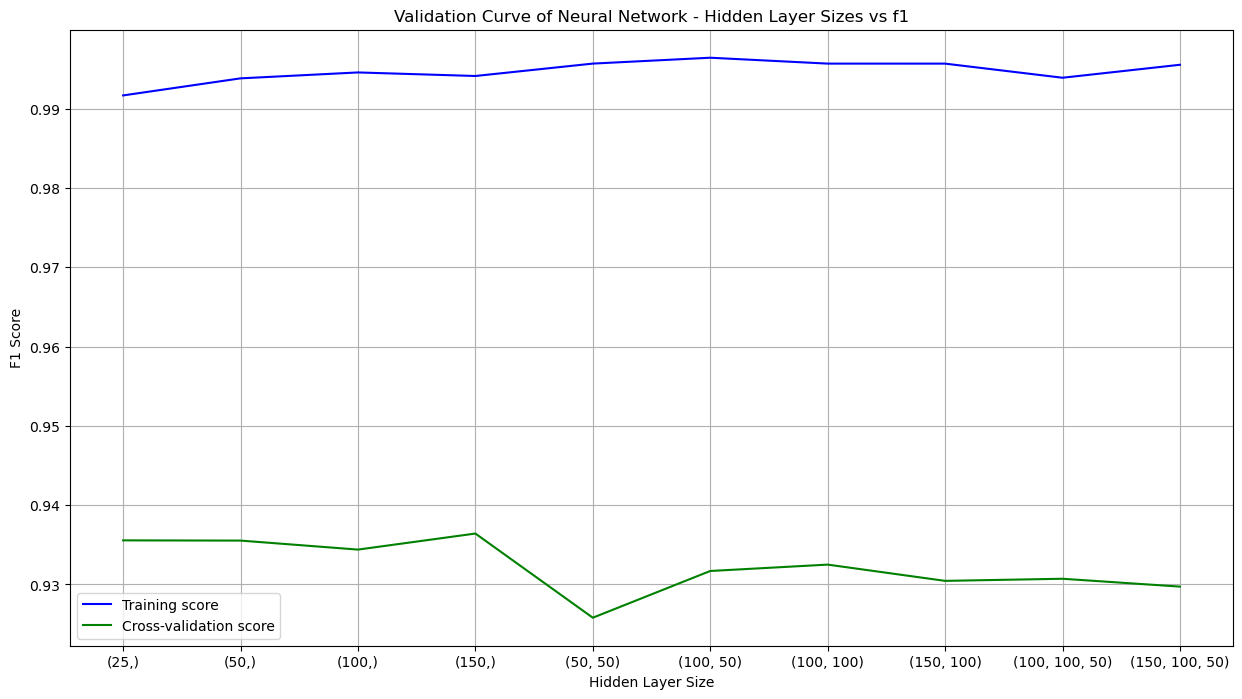

In [162]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(15, 8))
plt.plot(hidden_layer_sizes_labels, train_mean, label='Training score', color='blue')
plt.plot(hidden_layer_sizes_labels, test_mean, label='Cross-validation score', color='green')
plt.title('Validation Curve of Neural Network - Hidden Layer Sizes vs f1')
plt.xlabel('Hidden Layer Size')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [163]:
activation_range = ['logistic', 'tanh', 'relu']


In [168]:
train_scores, test_scores = validation_curve(
    MLPClassifier(solver='adam', max_iter=4000, learning_rate='constant', alpha=0.01, hidden_layer_sizes=(150,), random_state=903967749, verbose=True),
    X_train, y_train,
    param_name='activation',
    param_range=activation_range,
    cv=5,
    scoring=f1,
    n_jobs=-1
)

Iteration 555, loss = 0.09644406
Iteration 556, loss = 0.09532081
Iteration 557, loss = 0.09418960
Iteration 558, loss = 0.09368115
Iteration 559, loss = 0.09363731
Iteration 560, loss = 0.09384150
Iteration 561, loss = 0.09402672
Iteration 562, loss = 0.09350809
Iteration 563, loss = 0.09343093
Iteration 564, loss = 0.09341730
Iteration 565, loss = 0.09301013
Iteration 566, loss = 0.09286680
Iteration 567, loss = 0.09283919
Iteration 568, loss = 0.09298903
Iteration 569, loss = 0.09266767
Iteration 570, loss = 0.09243496
Iteration 571, loss = 0.09262389
Iteration 572, loss = 0.09249303
Iteration 573, loss = 0.09242967
Iteration 574, loss = 0.09215900
Iteration 575, loss = 0.09228057
Iteration 576, loss = 0.09305442
Iteration 577, loss = 0.09203760
Iteration 578, loss = 0.09201642
Iteration 579, loss = 0.09208873
Iteration 580, loss = 0.09201559
Iteration 581, loss = 0.09158181
Iteration 582, loss = 0.09156102
Iteration 583, loss = 0.09125225
Iteration 584, loss = 0.09136993
Iteration 

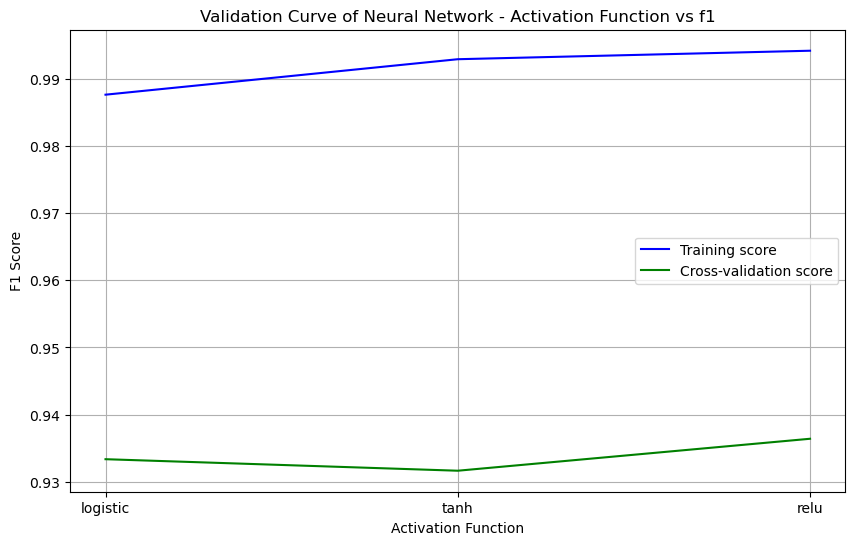

In [169]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(activation_range, train_mean, label='Training score', color='blue')
plt.plot(activation_range, test_mean, label='Cross-validation score', color='green')
plt.title('Validation Curve of Neural Network - Activation Function vs f1')
plt.xlabel('Activation Function')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid()
plt.show()

python(13376) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13377) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13379) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13380) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13382) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(13383) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


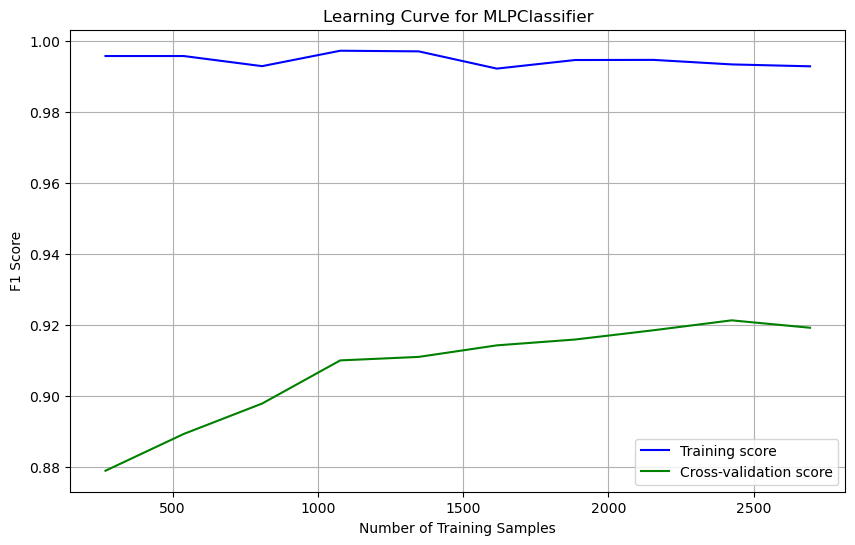

In [177]:
from sklearn.model_selection import learning_curve

mlp = MLPClassifier(solver='adam', max_iter=3000, learning_rate='constant', alpha=0.01,
                    hidden_layer_sizes=(150, ), activation='relu', random_state=903967749)

# Calculate learning curve
train_sizes, train_scores, cv_scores = learning_curve(
    mlp, X_train, y_train, cv=5, scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, cv_mean, label='Cross-validation score', color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Learning Curve for MLPClassifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Iteration 1, loss = 0.54602145
Iteration 2, loss = 0.36267946
Iteration 3, loss = 0.30563226
Iteration 4, loss = 0.27727963
Iteration 5, loss = 0.25989783
Iteration 6, loss = 0.24622851
Iteration 7, loss = 0.23548328
Iteration 8, loss = 0.22664136
Iteration 9, loss = 0.21900463
Iteration 10, loss = 0.21255231
Iteration 11, loss = 0.20704443
Iteration 12, loss = 0.20178024
Iteration 13, loss = 0.19728650
Iteration 14, loss = 0.19315326
Iteration 15, loss = 0.18953551
Iteration 16, loss = 0.18648677
Iteration 17, loss = 0.18358589
Iteration 18, loss = 0.18060007
Iteration 19, loss = 0.17724988
Iteration 20, loss = 0.17521579
Iteration 21, loss = 0.17273184
Iteration 22, loss = 0.17016809
Iteration 23, loss = 0.16830616
Iteration 24, loss = 0.16630899
Iteration 25, loss = 0.16374198
Iteration 26, loss = 0.16226193
Iteration 27, loss = 0.16056634
Iteration 28, loss = 0.15886508
Iteration 29, loss = 0.15693603
Iteration 30, loss = 0.15559671
Iteration 31, loss = 0.15397659
Iteration 32, los

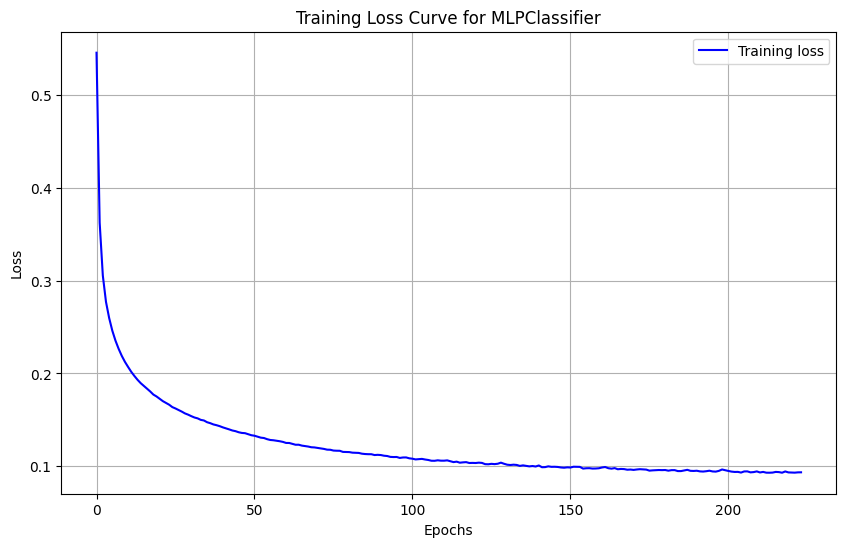

In [34]:
mlp = MLPClassifier(solver='adam', max_iter=3000, learning_rate='constant', alpha=0.15,
                    hidden_layer_sizes=(150, ), activation='relu', random_state=903967749, verbose=True)

mlp.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve for MLPClassifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [171]:
from sklearn.model_selection import StratifiedKFold


In [172]:
mlp = MLPClassifier(solver='adam', max_iter=1, learning_rate='constant', alpha=0.01,
                    hidden_layer_sizes=(150,), activation='relu', warm_start=True, random_state=903967749)


In [173]:
train_scores = []
cv_scores = []
epochs = np.arange(1, 101)
cv = StratifiedKFold(n_splits=5)


/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/e

Iteration 440, loss = 0.11452093
Iteration 441, loss = 0.11452429
Iteration 442, loss = 0.11428085
Iteration 443, loss = 0.11429619
Iteration 444, loss = 0.11404362
Iteration 445, loss = 0.11380603
Iteration 446, loss = 0.11389465
Iteration 447, loss = 0.11345987
Iteration 448, loss = 0.11350543
Iteration 449, loss = 0.11320499
Iteration 450, loss = 0.11311921
Iteration 451, loss = 0.11325979
Iteration 452, loss = 0.11277104
Iteration 453, loss = 0.11276132
Iteration 454, loss = 0.11243313
Iteration 455, loss = 0.11228929
Iteration 456, loss = 0.11209440
Iteration 457, loss = 0.11206778
Iteration 458, loss = 0.11189750
Iteration 459, loss = 0.11175021
Iteration 460, loss = 0.11158372
Iteration 461, loss = 0.11144002
Iteration 462, loss = 0.11129914
Iteration 463, loss = 0.11110116
Iteration 464, loss = 0.11095934
Iteration 465, loss = 0.11083935
Iteration 466, loss = 0.11080654
Iteration 467, loss = 0.11059163
Iteration 468, loss = 0.11039734
Iteration 469, loss = 0.11039514
Iteration 

/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(


5823
Iteration 93, loss = 0.09850827
Iteration 94, loss = 0.09803720
Iteration 95, loss = 0.09742947
Iteration 96, loss = 0.09700330
Iteration 97, loss = 0.09592447
Iteration 98, loss = 0.09597583
Iteration 99, loss = 0.09513262
Iteration 100, loss = 0.09420637
Iteration 101, loss = 0.09340286
Iteration 102, loss = 0.09295981
Iteration 103, loss = 0.09229068
Iteration 104, loss = 0.09281787
Iteration 105, loss = 0.09264082
Iteration 106, loss = 0.09130006
Iteration 107, loss = 0.09020168
Iteration 108, loss = 0.08985368
Iteration 109, loss = 0.08872074
Iteration 110, loss = 0.08820609
Iteration 111, loss = 0.08746474
Iteration 112, loss = 0.08706633
Iteration 113, loss = 0.08664192
Iteration 114, loss = 0.08612553
Iteration 115, loss = 0.08552034
Iteration 116, loss = 0.08494844
Iteration 117, loss = 0.08490678
Iteration 118, loss = 0.08403864
Iteration 119, loss = 0.08457861
Iteration 120, loss = 0.08315896
Iteration 121, loss = 0.08348440
Iteration 122, loss = 0.08202528
Iteration 12

/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(


teration 371, loss = 0.03943106
Iteration 372, loss = 0.03742587
Iteration 373, loss = 0.03751321
Iteration 374, loss = 0.03742543
Iteration 375, loss = 0.03665683
Iteration 376, loss = 0.03678973
Iteration 377, loss = 0.03661239
Iteration 378, loss = 0.03680936
Iteration 379, loss = 0.03748388
Iteration 380, loss = 0.03753925
Iteration 381, loss = 0.03660402
Iteration 382, loss = 0.03692222
Iteration 383, loss = 0.03700651
Iteration 384, loss = 0.03671100
Iteration 385, loss = 0.03639892
Iteration 386, loss = 0.03742714
Iteration 387, loss = 0.03614305
Iteration 388, loss = 0.03649856
Iteration 389, loss = 0.03874878
Iteration 390, loss = 0.03617342
Iteration 391, loss = 0.03611849
Iteration 392, loss = 0.03663791
Iteration 393, loss = 0.03560863
Iteration 394, loss = 0.03698259
Iteration 395, loss = 0.03604898
Iteration 396, loss = 0.03585008
Iteration 397, loss = 0.03570460
Iteration 398, loss = 0.03583104
Iteration 399, loss = 0.03623955
Iteration 400, loss = 0.03560318
Iteration 4

/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(


0.13587821
Iteration 63, loss = 0.13497791
Iteration 64, loss = 0.13419487
Iteration 65, loss = 0.13388489
Iteration 66, loss = 0.13225636
Iteration 67, loss = 0.13142292
Iteration 68, loss = 0.13081935
Iteration 69, loss = 0.12971103
Iteration 70, loss = 0.12912610
Iteration 71, loss = 0.12810211
Iteration 72, loss = 0.12734196
Iteration 73, loss = 0.12645283
Iteration 74, loss = 0.12568063
Iteration 75, loss = 0.12484527
Iteration 76, loss = 0.12399273
Iteration 77, loss = 0.12320289
Iteration 78, loss = 0.12251633
Iteration 79, loss = 0.12170532
Iteration 80, loss = 0.12108116
Iteration 81, loss = 0.12070515
Iteration 82, loss = 0.11956994
Iteration 83, loss = 0.11887151
Iteration 84, loss = 0.11822670
Iteration 85, loss = 0.11756831
Iteration 86, loss = 0.11683265
Iteration 87, loss = 0.11634214
Iteration 88, loss = 0.11560815
Iteration 89, loss = 0.11519552
Iteration 90, loss = 0.11384865
Iteration 91, loss = 0.11341708
Iteration 92, loss = 0.11279372
Iteration 93, loss = 0.112172

/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(


= 0.11610106
Iteration 301, loss = 0.11656742
Iteration 302, loss = 0.11613954
Iteration 303, loss = 0.11572371
Iteration 304, loss = 0.11558724
Iteration 305, loss = 0.11537719
Iteration 306, loss = 0.11526183
Iteration 307, loss = 0.11522668
Iteration 308, loss = 0.11506749
Iteration 309, loss = 0.11527221
Iteration 310, loss = 0.11553253
Iteration 311, loss = 0.11461230
Iteration 312, loss = 0.11446564
Iteration 313, loss = 0.11442769
Iteration 314, loss = 0.11396016
Iteration 315, loss = 0.11443725
Iteration 316, loss = 0.11450305
Iteration 317, loss = 0.11411952
Iteration 318, loss = 0.11426814
Iteration 319, loss = 0.11315475
Iteration 320, loss = 0.11315731
Iteration 321, loss = 0.11318598
Iteration 322, loss = 0.11280117
Iteration 323, loss = 0.11236096
Iteration 324, loss = 0.11244266
Iteration 325, loss = 0.11226318
Iteration 326, loss = 0.11214695
Iteration 327, loss = 0.11213092
Iteration 328, loss = 0.11217413
Iteration 329, loss = 0.11238443
Iteration 330, loss = 0.111428

/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CS7641-ML/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anacond

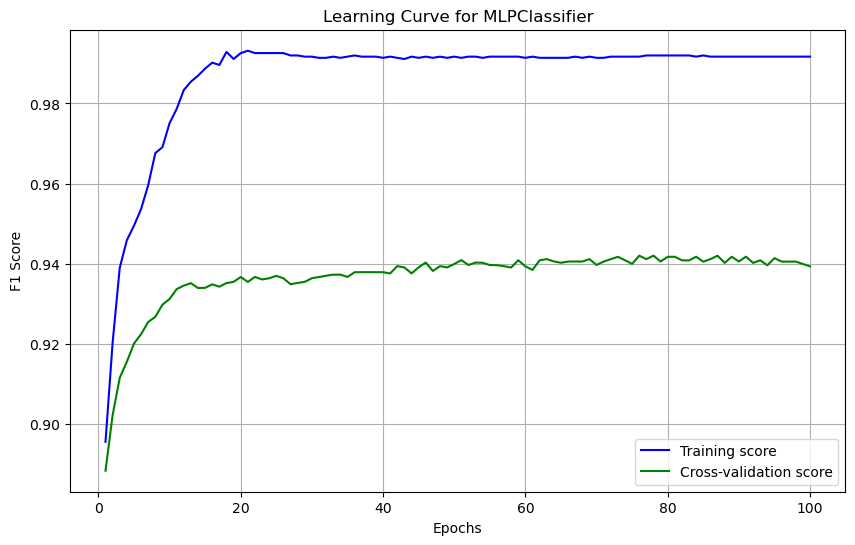

In [174]:
for epoch in epochs:
    mlp.max_iter = epoch
    mlp.fit(X_train, y_train)

    train_score = f1_score(y_train, mlp.predict(X_train), average='weighted')
    train_scores.append(train_score)

    cv_score = cross_val_score(mlp, X_train, y_train, cv=cv, scoring=f1).mean()
    cv_scores.append(cv_score)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_scores, label='Training score', color='blue')
plt.plot(epochs, cv_scores, label='Cross-validation score', color='green')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Learning Curve for MLPClassifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

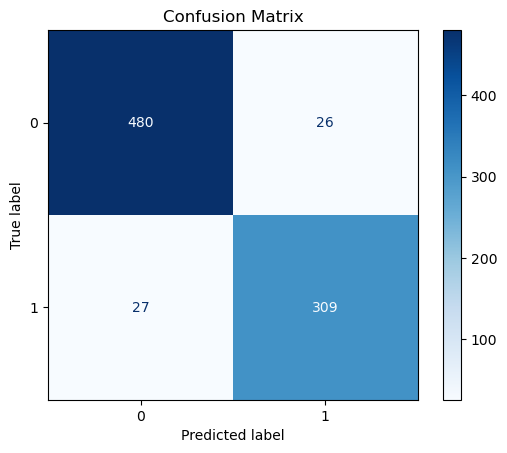

F1 Score: 0.94


In [175]:
mlp = MLPClassifier(solver='adam', max_iter=3000, learning_rate='constant', alpha=0.01, hidden_layer_sizes=(150, ), activation='relu', random_state=903967749)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

In [208]:
algorithms = {
    'SVM': svc,
    'k-NN': knn,
    'Neural Network': mlp
}

# Dictionary to store wall clock times
wall_clock_times_training = {}
wall_clock_times_testing = {}

# Measure wall clock times for each algorithm
for name, model in algorithms.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Calculate wall clock time
    wall_clock_times_training[name] = end_time - start_time

    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    
    # Calculate wall clock time
    wall_clock_times_testing[name] = end_time - start_time

# Display wall clock times
print("Spambase Training times")
for name, duration in wall_clock_times_training.items():
    print(f"{name}: {duration:.6f} seconds")

print("\nSpambase Testing times")
for name, duration in wall_clock_times_testing.items():
    print(f"{name}: {duration:.6f} seconds")

Spambase Training times
SVM: 8.461263 seconds
k-NN: 0.001904 seconds
Neural Network: 8.968058 seconds

Spambase Testing times
SVM: 0.031741 seconds
k-NN: 0.036680 seconds
Neural Network: 0.001340 seconds
